In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.image as mpimg

In [3]:
def get_dataset():
    path='E:\\cnns\\digit_prediction\\digit_'
    Y_list=[6]
    X=mpimg.imread('E:\\cnns\\digit_prediction\\digit_6\\digit6__4cc17a78-77e9-11e7-8382-0af8d8ef1070.jpg')
    X=X[:,:,1]
    X=X[np.int64(np.linspace(0,199,64))]
    X=X.T
    X=X[np.int64(np.linspace(0,199,64))]
    X=X.T
    X=X.reshape(1,64,64)
    
    
    for digit in range(0,10):
        no_of_examples=len(glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*'))
        examples=glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*')
        for i in examples:
            img=mpimg.imread(i)
            img=img[:,:,1]
            w=img.shape[0]
            h=img.shape[1]
            if w>=64 and h>=64:
                img=img[np.int64(np.linspace(0,w-1,64))]
                img=img.T
                img=img[np.int64(np.linspace(0,h-1,64))]
                img=img.T
                position=np.random.randint(X.shape[0])
                X=np.insert(X,position,values=img,axis=0)
                Y_list.insert(position,digit)
    Y=np.array(Y_list)
    return (X,Y)
    
    
            
            
            

In [4]:
def normalize(X_train):
    m=len(X_train)
    mean=(1/m)*np.sum(X_train,axis=0,keepdims=True)
    X_train=X_train-mean
    variance=np.sum(np.square(X_train),axis=0,keepdims=True)
    std=np.sqrt(variance)
    X_train=X_train/std
    return X_train
    

# preparing data

In [5]:
X,Y=get_dataset()

In [6]:
X_train=normalize(X)

In [7]:
df_Y=pd.DataFrame(Y)

In [10]:
# df=pd.get_dummies(df_Y[0])

In [8]:
Y_train=np.array(df_Y)

In [9]:
Y_train.shape

(6144, 1)

In [10]:
X_train.shape

(6144, 64, 64)

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
from tensorflow.keras import layers


In [148]:
model=tf.keras.Sequential()

In [149]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),input_shape=(64,64,1),activation='relu'))

In [150]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [151]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu'))

In [152]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [153]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu'))

In [154]:
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [155]:
model.add(tf.keras.layers.Flatten())

In [156]:
model.add(tf.keras.layers.Dense(32,activation='relu'))


In [157]:
model.add(layers.Dropout(0.3))

In [158]:
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.3))

In [159]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [160]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 31, 31, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 1, 32)          9248      
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)              

In [166]:
history=model.fit(X_train.reshape(6144,64,64,1)[1:5000,:,:,:], Y_train[1:5000,:], epochs=50)

Train on 4999 samples
Epoch 1/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4989 - accuracy: 0.8376
Epoch 2/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4703 - accuracy: 0.8516
Epoch 3/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4933 - accuracy: 0.8424
Epoch 4/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4627 - accuracy: 0.8464
Epoch 5/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4509 - accuracy: 0.8508
Epoch 6/50
4999/4999 [==============================] - 5s 1ms/sample - loss: 0.4364 - accuracy: 0.8618
Epoch 7/50
4999/4999 [==============================] - 6s 1ms/sample - loss: 0.4431 - accuracy: 0.8580
Epoch 8/50
4999/4999 [==============================] - 6s 1ms/sample - loss: 0.4438 - accuracy: 0.8590
Epoch 9/50
4999/4999 [==============================] - 6s 1ms/sample - loss: 0.4318 - accuracy: 0.8578
Epoch 10/50
4999/4999 [===================

In [167]:
model.evaluate(X_train.reshape(6144,64,64,1)[5000:,:,:,:],Y_train[5000:,:], verbose=2)

1144/1144 - 0s - loss: 1.3313 - accuracy: 0.7806


[1.3312565484247008, 0.7805944]

In [168]:
model.save('weights.h5')

Text(0, 0.5, 'accuracy')

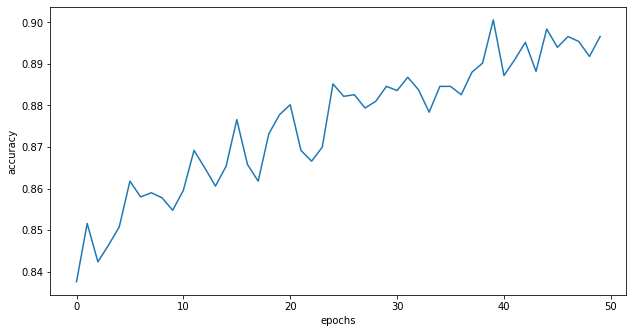

In [197]:
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [195]:
fig.savefig('accuracy.jpg')

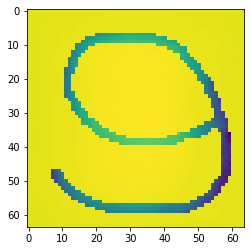

In [138]:
plt.imshow(X_train[12])

In [188]:
np.int64(model.predict(X_train[51].reshape(1,64,64,1))==np.max(model.predict(X_train[51].reshape(1,64,64,1))))

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [189]:
Y_train[51]

array([8])